### Explosion


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

carico "globalterrorismdb_0718dist.csv" 

In [2]:
gtds = pd.read_csv("globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

/home/alberico/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


alcune info utili

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
gtds.shape

(181691, 135)

In [4]:
gtds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
print(len(gtds))
missing_value = gtds.isna().sum()
print(missing_value/len(gtds))

181691
eventid               0.000000
iyear                 0.000000
imonth                0.000000
iday                  0.000000
approxdate            0.949150
extended              0.000000
resolution            0.987781
country               0.000000
country_txt           0.000000
region                0.000000
region_txt            0.000000
provstate             0.002317
city                  0.002389
latitude              0.025076
longitude             0.025081
specificity           0.000033
vicinity              0.000000
location              0.694564
summary               0.363964
crit1                 0.000000
crit2                 0.000000
crit3                 0.000000
doubtterr             0.000006
alternative           0.840328
alternative_txt       0.840328
multiple              0.000006
success               0.000000
suicide               0.000000
attacktype1           0.000000
attacktype1_txt       0.000000
attacktype2           0.965249
attacktype2_txt       0.965249
a

In [6]:
gtdsDropped = gtds
for i in range(0,missing_value.shape[0]-1,1):
    if ((missing_value.values[i]/len(gtds))>0.80):
        gtdsDropped = gtdsDropped.drop(columns=[missing_value.index[i]])

In [7]:
gtdsDropped.shape

(181691, 68)

In [8]:
missing_value = gtdsDropped.isna().sum()
missing_value/len(gtds)

eventid             0.000000
iyear               0.000000
imonth              0.000000
iday                0.000000
extended            0.000000
country             0.000000
country_txt         0.000000
region              0.000000
region_txt          0.000000
provstate           0.002317
city                0.002389
latitude            0.025076
longitude           0.025081
specificity         0.000033
vicinity            0.000000
location            0.694564
summary             0.363964
crit1               0.000000
crit2               0.000000
crit3               0.000000
doubtterr           0.000006
multiple            0.000006
success             0.000000
suicide             0.000000
attacktype1         0.000000
attacktype1_txt     0.000000
targtype1           0.000000
targtype1_txt       0.000000
targsubtype1        0.057091
targsubtype1_txt    0.057091
corp1               0.234189
target1             0.003500
natlty1             0.008581
natlty1_txt         0.008581
gname         

Gli attacchi esplosivi sono quelli che fanno più morti ??
Prendiamo solo alcune colonne di interesse.

In [9]:
ds = gtds[['eventid','attacktype1', 'attacktype1_txt','nkill','nkillus','nkillter','nwound','weaptype1','weaptype1_txt']]
ds.head(10)

,eventid,attacktype1,attacktype1_txt,nkill,nkillus,nkillter,nwound,weaptype1,weaptype1_txt
0,197000000001,1,Assassination,1.0,NaN,NaN,0.0,13,Unknown
1,197000000002,6,Hostage Taking (Kidnapping),0.0,NaN,NaN,0.0,13,Unknown
2,197001000001,1,Assassination,1.0,NaN,NaN,0.0,13,Unknown
3,197001000002,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Explosives
4,197001000003,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,8,Incendiary
5,197001010002,2,Armed Assault,0.0,0.0,0.0,0.0,5,Firearms
6,197001020001,1,Assassination,0.0,NaN,NaN,0.0,5,Firearms
7,197001020002,3,Bombing/Explosion,0.0,0.0,0.0,0.0,6,Explosives
8,197001020003,7,Facility/Infrastructure Attack,0.0,0.0,0.0,0.0,8,Incendiary
9,197001030001,7,Facility/Infrastructure Attack,0.0,0.0,0.0,0.0,8,Incendiary


nel numero di kill vediamo alcuni NaN, molti sono 0 e molti altri 1 (valori inconsistenti)
Sia nel attacktype1 e weaptype1 cmopaiono elementi riferiti all'attacco riguardo esplosioni.
attacktype1 = 3 e weaptype1 = 6
Coincideranno?

In [10]:
count = 0
for i in range(0,len(ds)-1,1):
    if (ds['attacktype1'][i]==3 and ds['weaptype1'][i]==6):
        count +=1
print("valori in comune: ",count)
print(ds['attacktype1'].value_counts())
ds['weaptype1'].value_counts()

valori in comune:  86790
3    88255
2    42669
1    19312
6    11158
7    10356
9     7276
8     1015
5      991
4      659
Name: attacktype1, dtype: int64


6     92426
5     58524
13    15157
8     11135
9      3655
2       321
11      141
10      136
12      114
1        35
7        33
3        14
Name: weaptype1, dtype: int64

No, non coincidono.
Sono 86790 le coincidenze.
Per l'attacktype1 Bombing/Explosion abbiamo 88255 valori
Per il weaptype1 Explosives abbiamo 92426. 
In entrambi i casi vediamo che è il valore dominante di attacchi (uno più del doppio l'altro quasi)
Per il weaptype1 c'è da sottolineare che il terzo posto è ricoperto da 13 (Unknown)


vediamo sommando i morti (nkill) e feriti (nwound) per attacktype1 (primo caso) e weaptype1 (secondo caso) cosa succede, perchè avendo molti valori a 0 o a 1 

In [11]:
ds2 = ds[['attacktype1','attacktype1_txt','nkill','nkillus','nkillter','nwound']].groupby(['attacktype1','attacktype1_txt']).agg('sum')
ds2.sort_values(by=['nkill'])

,,nkill,nkillus,nkillter,nwound
attacktype1,attacktype1_txt,,,,
8,Unarmed Assault,880.0,14.0,53.0,14027.0
7,Facility/Infrastructure Attack,3642.0,31.0,498.0,3765.0
4,Hijacking,3718.0,2919.0,102.0,17001.0
5,Hostage Taking (Barricade Incident),4478.0,118.0,521.0,3966.0
6,Hostage Taking (Kidnapping),24231.0,74.0,2360.0,6446.0
1,Assassination,24920.0,153.0,700.0,13887.0
9,Unknown,32381.0,58.0,11102.0,14725.0
3,Bombing/Explosion,157321.0,1509.0,20009.0,372686.0
2,Armed Assault,160297.0,515.0,22946.0,77366.0


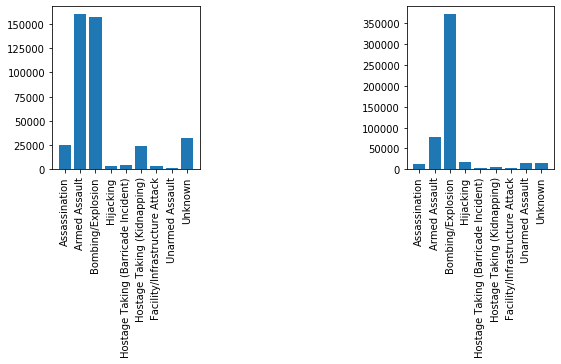

In [12]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.xticks(rotation=90)
plt.bar(ds2.index.get_level_values(1), ds2['nkill'])
plt.subplot(133)
plt.bar(ds2.index.get_level_values(1), ds2['nwound'])
plt.xticks(rotation=90)
plt.show()

In [13]:
ds2 = ds[['weaptype1','weaptype1_txt','nkill','nkillus','nkillter','nwound']].groupby(['weaptype1', 'weaptype1_txt']).agg('sum')
ds2.sort_values(by=['nkill'])

,,nkill,nkillus,nkillter,nwound
weaptype1,weaptype1_txt,,,,
7,Fake Weapons,1.0,0.0,1.0,0.0
3,Radiological,2.0,0.0,1.0,4.0
1,Biological,9.0,6.0,0.0,805.0
11,Sabotage Equipment,83.0,2.0,3.0,286.0
12,Other,123.0,0.0,0.0,105.0
2,Chemical,624.0,0.0,45.0,13825.0
10,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",3184.0,2917.0,67.0,17121.0
8,Incendiary,5476.0,26.0,457.0,5530.0
9,Melee,10575.0,42.0,417.0,5495.0


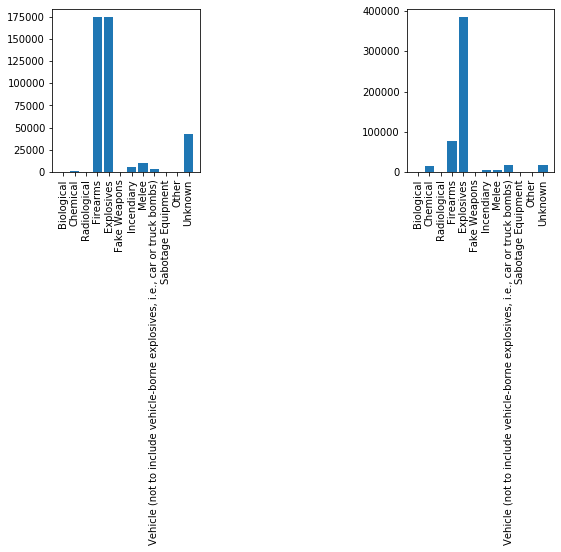

In [14]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.xticks(rotation=90)
plt.bar(ds2.index.get_level_values(1), ds2['nkill'])
plt.subplot(133)
plt.xticks(rotation=90)
plt.bar(ds2.index.get_level_values(1), ds2['nwound'])
plt.show()